# Fraud Detection on Transaction Data

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

## Set Working Directory

In [2]:
import os
os.chdir(os.getcwd())
os.chdir("C:/Users/MelodyPogula/Downloads")

## Data

In [3]:
### Data
transaction = pd.read_csv("transaction.csv")
data = transaction.copy()

y = data["isFraud"]


## EDA

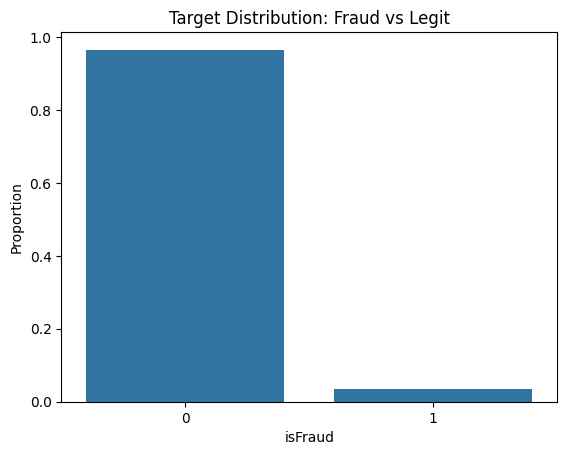

In [ ]:
### EDA
# fraud vs legit
fraud_counts = y.value_counts(normalize=True)
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title("Target Distribution: Fraud vs Legit")
plt.xlabel("isFraud")
plt.ylabel("Proportion")
plt.show()


# Data for Random Forest

## Handle Missing Data

In [5]:
# Handle Missing Data
# for random forest
X_rf = data.copy()

# impute numeric
num_cols = X_rf.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
X_rf[num_cols] = imputer_num.fit_transform(X_rf[num_cols])

# categorical
cat_cols = X_rf.select_dtypes(include=['object']).columns

#fill in empty cells as "Missing"
imputer_cat = SimpleImputer(strategy='constant', fill_value="Missing")
X_rf[cat_cols] = imputer_cat.fit_transform(X_rf[cat_cols])

## Encoding

In [6]:
cat_cols = X_rf.select_dtypes(include=["object"]).columns
num_cols = X_rf.select_dtypes(exclude=["object"]).columns
# one-hot encode
X_rf_enc = pd.get_dummies(X_rf, columns=cat_cols, drop_first=True)

In [8]:
rf_data = X_rf_enc.copy()

# Data for LightGBM and CatBoost Models

In [9]:
boosting_data = data.copy()

# Data for XGBoost

## Encoding

In [7]:
cat_cols = data.select_dtypes(include=["object"]).columns
num_cols = data.select_dtypes(exclude=["object"]).columns
# one-hot encode
X_xgb_enc = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [10]:
XGB_data = X_xgb_enc.copy()

# List of IDs in both datasets
### use to make the transaction data subset

In [ ]:
identity = pd.read_csv("identity.csv")
merged_df = pd.merge(identity, transaction, on='TransactionID', how='inner')

overlapping_ids = merged_df['TransactionID'].tolist()